# 做一个简单的回归

In [17]:
import torch # torch主库
import matplotlib.pyplot as plt # 画图库
from torch.nn.functional import relu # 激活函数使用relu，这里单独import relu是为了简写

## 生成非线性数据

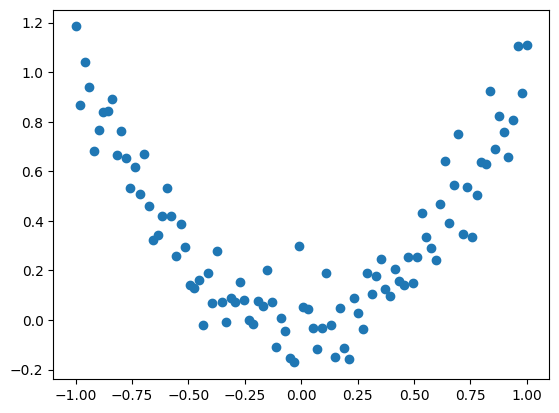

In [18]:
# unsqueeze的必要性：这个线性数据的生成是为了参与后面的Linear学习器，而Linear的输入层规定成了1，所以x的维度应该是(?,1)，而此处的?=100。
x = torch.linspace(-1, 1, 100).unsqueeze(dim=1) # x通过unsqueeze拓展成二维，由于plt的良好设计，这里一维的x和二维的x做出的散点图是相同的。
y = x.pow(2)+torch.randn(x.size())*0.1
plt.scatter(x,y)
plt.show()

## 定义神经网络

In [19]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)
        self.output = torch.nn.Linear(hidden_size, output_size)
    def forward(self, x):
        return self.output(relu(self.hidden(x)))

## 训练

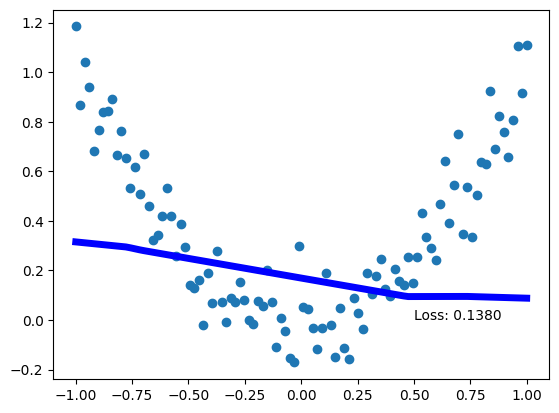

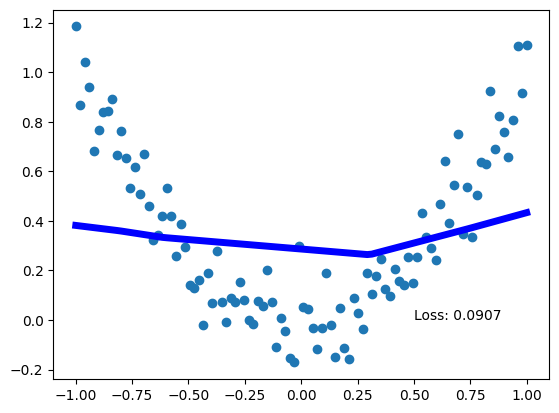

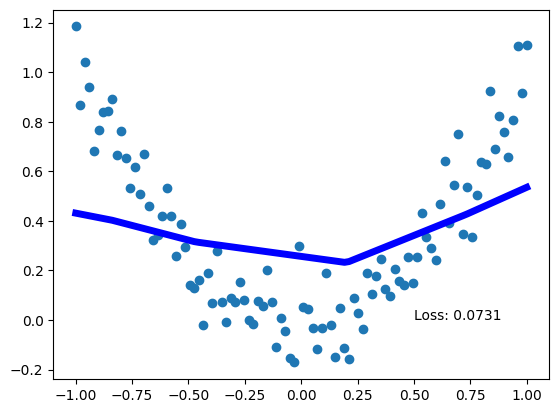

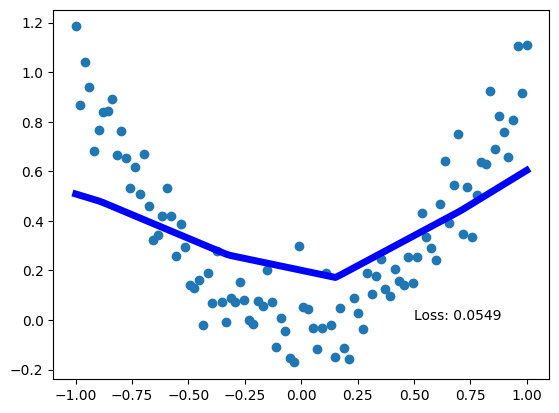

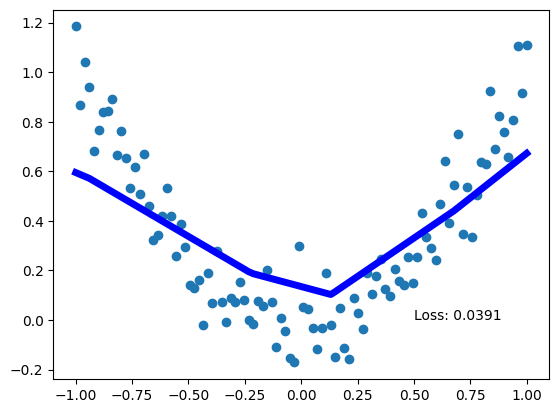

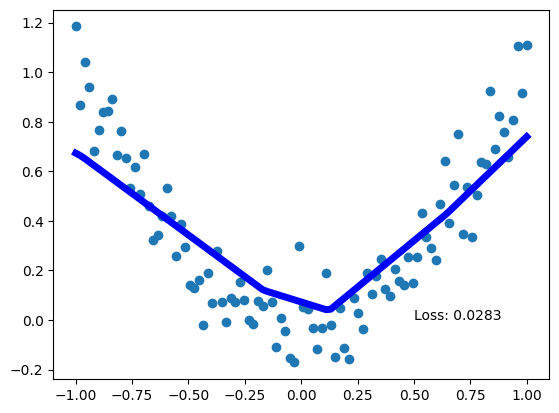

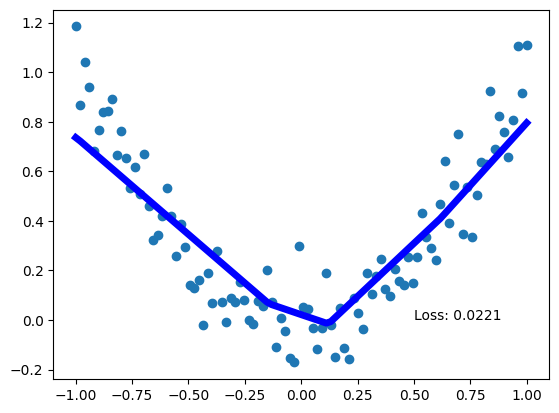

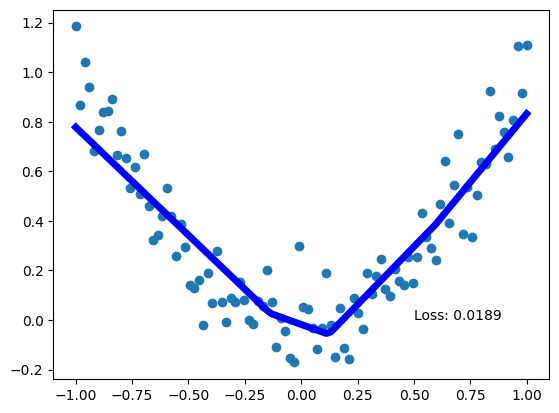

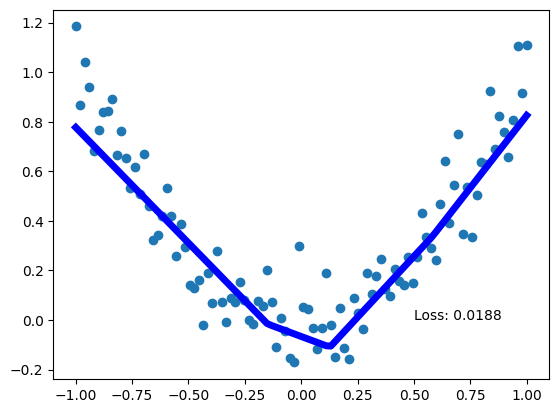

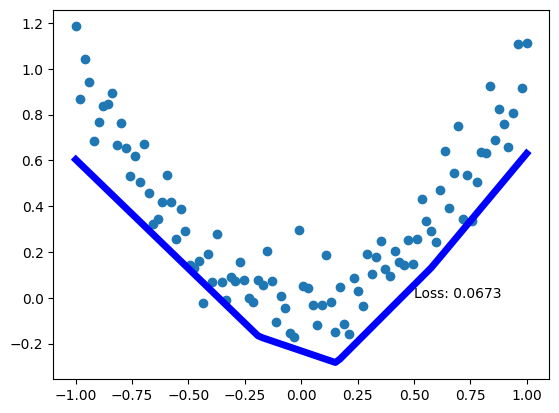

In [20]:
plt.ion() # jupyter暂时做不到实时更新，ion和ioff在支持的场合下是有用的。
plt.show()
net = Net(1, 10, 1)
criterion = torch.nn.MSELoss() # 定义计算损失的方式（损失就是一个度量，用来度量预测值和真实值之间的“知识损失”）
optimizer = torch.optim.SGD(net.parameters(), lr=0.3) # 定义优化器，很智能，只需要指明一个学习率就能运转。
for epoch in range(100):
    optimizer.zero_grad() # 给网络的梯度清零（不然会累加）
    output = net(x) # 把x隐式地传给net中的forward。为什么要传入x这么个二维表？一方面，网络的输入虽然定义为1，但是网络的输入应该是一个列表的形式。另一方面，网络的输入是批量的，这个批量输入也是以列表的形式。综上，此处网络的输入是一个二维表。
    loss = criterion(output, y) # 度量预测值和真实值之间的“知识损失”
    loss.backward() # 反向传播“计算损失过程中的梯度”
    optimizer.step() # 通过参照反向传播更新了的梯度，更新神经网络中的权重
    if epoch % 10 == 0:
        plt.cla() # clear清空图像，搭配plt.ion使用的
        plt.scatter(x.data, y.data)
        plt.plot(x.data, output.detach(), 'b-', lw=5)
        plt.text(0.5,0, 'Loss: {:.4f}'.format(loss.item())) # 添加文本(横坐标，纵坐标，文本内容)
        plt.pause(0.1)

plt.ioff()
plt.show()
